In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import os

In [2]:
files = os.listdir("data")
df = pd.DataFrame()
for file in files:
    arq = os.path.join(os.getcwd(),"data", file)
    if "ipynb" not in arq:
        #print(arq)
        dfp = pd.read_csv(arq)
        df = pd.concat([df, dfp])

In [3]:
df2 = df.copy()
df2["datetime"] = pd.to_datetime(df[["year","month","day", "hour"]])
df2["date"] = pd.to_datetime(df[["year","month","day"]])

In [4]:

encoder = LabelEncoder()
df2['wd'] = encoder.fit_transform(df2['wd'])

In [5]:
df2.drop(["No", "year","month", "day", "hour", "datetime"], axis=1, inplace=True)
df2.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,Aotizhongxin,2013-03-01
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,Aotizhongxin,2013-03-01
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,Aotizhongxin,2013-03-01
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,Aotizhongxin,2013-03-01
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,Aotizhongxin,2013-03-01


In [6]:
df2 = df2.groupby(["station", "date"]).sum().reset_index()

In [7]:
d_agg = {
    'PM2.5':np.average,
    'PM10':np.average,
    'SO2':np.average,
    'NO2':np.average,
    'CO':np.average,
    'O3':np.average,
    'TEMP':np.average,
    'PRES':np.average,
    'DEWP':np.average,
    'RAIN':np.sum,
    'WSPM':np.average
}


df2 = df2.groupby(["station", "date"]).aggregate(d_agg).reset_index()
df2['month'] = df2['date'].dt.month

In [8]:
df2.tail()

,station,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,month
17527,Wanshouxigong,2017-02-24,959.0,1174.0,222.0,1249.0,21300.0,897.0,124.0,24504.3,-267.4,0.0,38.3,2
17528,Wanshouxigong,2017-02-25,185.0,315.0,67.0,621.0,8000.0,1086.0,173.9,24451.5,-258.1,0.0,43.8,2
17529,Wanshouxigong,2017-02-26,644.0,1010.0,192.0,1274.0,12000.0,715.0,173.0,24488.1,-198.2,0.0,37.6,2
17530,Wanshouxigong,2017-02-27,1431.0,1866.0,309.0,1776.0,30600.0,407.0,200.1,24411.4,-171.5,0.0,36.4,2
17531,Wanshouxigong,2017-02-28,263.0,517.0,114.0,722.0,12200.0,1263.0,263.0,24357.3,-306.8,0.0,49.4,2


In [9]:
def lag_1_by_group(key, value_df):
    df = value_df.assign(group = key) # this pandas method returns a copy of the df, with group columns assigned the key value
    x = (df.sort_values(by=["date"], ascending=True)
        .set_index(["date"])
        .shift(1)
        .set_axis(['station', 'PM2.5_lag_1', 'PM10_lag_1', 'SO2_lag_1', 'NO2_lag_1', 'CO_lag_1', 'O3_lag_1', 'TEMP_lag_1', 'PRES_lag_1', 'DEWP_lag_1',
       'RAIN_lag_1', 'WSPM_lag_1', 'month','group'], axis=1)
               )
    x["station"] = x["station"].fillna(value=key)
    return x

In [10]:
def lag_2_by_group(key, value_df):
    df = value_df.assign(group = key) # this pandas method returns a copy of the df, with group columns assigned the key value
    x = (df.sort_values(by=["date"], ascending=True)
        .set_index(["date"])
        .shift(2)
        .set_axis(['station','PM2.5_lag_2', 'PM10_lag_2', 'SO2_lag_2', 'NO2_lag_2', 'CO_lag_2', 'O3_lag_2', 'TEMP_lag_2', 'PRES_lag_2', 'DEWP_lag_2',
       'RAIN_lag_2', 'WSPM_lag_2', 'month','group'], axis=1)
               )
    x["station"] = x["station"].fillna(value=key)
    return x

In [11]:
grouped_df = df2.groupby(["station"])

In [12]:
dflist = [lag_1_by_group(g, grouped_df.get_group(g)) for g in grouped_df.groups.keys()]
df4 = pd.concat(dflist, axis=0).reset_index()
df4.head()

,date,station,PM2.5_lag_1,PM10_lag_1,SO2_lag_1,NO2_lag_1,CO_lag_1,O3_lag_1,TEMP_lag_1,PRES_lag_1,DEWP_lag_1,RAIN_lag_1,WSPM_lag_1,month,group
0,2013-03-01,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-03-02,Aotizhongxin,171.0,258.0,281.0,542.0,10300.0,1533.0,33.4,24645.0,-449.9,0.0,78.1,3.0,Aotizhongxin
2,2013-03-03,Aotizhongxin,738.0,1010.0,879.0,1600.0,19798.0,714.0,14.8,24644.4,-382.5,0.0,35.5,3.0,Aotizhongxin
3,2013-03-04,Aotizhongxin,1846.0,2893.0,1471.0,1944.0,38895.0,459.0,133.6,24350.6,-295.6,0.0,39.8,3.0,Aotizhongxin
4,2013-03-05,Aotizhongxin,545.0,1070.0,526.0,1080.0,14200.0,1290.0,239.1,24423.6,-280.4,0.0,57.7,3.0,Aotizhongxin


In [13]:
dflist = [lag_2_by_group(g, grouped_df.get_group(g)) for g in grouped_df.groups.keys()]
df5 = pd.concat(dflist, axis=0).reset_index()
df5.head()

,date,station,PM2.5_lag_2,PM10_lag_2,SO2_lag_2,NO2_lag_2,CO_lag_2,O3_lag_2,TEMP_lag_2,PRES_lag_2,DEWP_lag_2,RAIN_lag_2,WSPM_lag_2,month,group
0,2013-03-01,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-03-02,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-03-03,Aotizhongxin,171.0,258.0,281.0,542.0,10300.0,1533.0,33.4,24645.0,-449.9,0.0,78.1,3.0,Aotizhongxin
3,2013-03-04,Aotizhongxin,738.0,1010.0,879.0,1600.0,19798.0,714.0,14.8,24644.4,-382.5,0.0,35.5,3.0,Aotizhongxin
4,2013-03-05,Aotizhongxin,1846.0,2893.0,1471.0,1944.0,38895.0,459.0,133.6,24350.6,-295.6,0.0,39.8,3.0,Aotizhongxin


In [14]:
df3 = df2.set_index(["station", "date"], drop=True)
df4 = df4.set_index(["station", "date"], drop=True).drop("month", axis=1)
#df5 = df5.set_index(["station", "date"], drop=True).drop("month", axis=1)

In [15]:
df4.head()

PM2.5_lag_1  PM10_lag_1  SO2_lag_1  NO2_lag_1  \
station      date                                                        
Aotizhongxin 2013-03-01          NaN         NaN        NaN        NaN   
             2013-03-02        171.0       258.0      281.0      542.0   
             2013-03-03        738.0      1010.0      879.0     1600.0   
             2013-03-04       1846.0      2893.0     1471.0     1944.0   
             2013-03-05        545.0      1070.0      526.0     1080.0   

                         CO_lag_1  O3_lag_1  TEMP_lag_1  PRES_lag_1  \
station      date                                                     
Aotizhongxin 2013-03-01       NaN       NaN         NaN         NaN   
             2013-03-02   10300.0    1533.0        33.4     24645.0   
             2013-03-03   19798.0     714.0        14.8     24644.4   
             2013-03-04   38895.0     459.0       133.6     24350.6   
             2013-03-05   14200.0    1290.0       239.1     24423.6   

                         DEWP_lag_1  RAIN_lag_1  WSPM_lag_1         group  
station      date                                                          
Aotizhongxin 2013-03-01         NaN         NaN         NaN           NaN  
             2013-03-02      -449.9         0.0        78.1  Aotizhongxin  
             2013-03-03      -382.5         0.0        35.5  Aotizhongxin  
             2013-03-04      -295.6         0.0        39.8  Aotizhongxin  
             2013-03-05      -280.4         0.0        57.7  Aotizhongxin

In [16]:
df6 = pd.concat([df3, df4], axis=1)

In [17]:
df6.head()

PM2.5    PM10     SO2     NO2       CO      O3  \
station      date                                                          
Aotizhongxin 2013-03-01   171.0   258.0   281.0   542.0  10300.0  1533.0   
             2013-03-02   738.0  1010.0   879.0  1600.0  19798.0   714.0   
             2013-03-03  1846.0  2893.0  1471.0  1944.0  38895.0   459.0   
             2013-03-04   545.0  1070.0   526.0  1080.0  14200.0  1290.0   
             2013-03-05  3573.0  4411.0  2253.0  3188.0  56591.0  1643.0   

                          TEMP     PRES   DEWP  RAIN  ...  SO2_lag_1  \
station      date                                     ...              
Aotizhongxin 2013-03-01   33.4  24645.0 -449.9   0.0  ...        NaN   
             2013-03-02   14.8  24644.4 -382.5   0.0  ...      281.0   
             2013-03-03  133.6  24350.6 -295.6   0.0  ...      879.0   
             2013-03-04  239.1  24423.6 -280.4   0.0  ...     1471.0   
             2013-03-05  151.0  24261.6 -180.6   0.0  ...      526.0   

                         NO2_lag_1  CO_lag_1  O3_lag_1  TEMP_lag_1  \
station      date                                                    
Aotizhongxin 2013-03-01        NaN       NaN       NaN         NaN   
             2013-03-02      542.0   10300.0    1533.0        33.4   
             2013-03-03     1600.0   19798.0     714.0        14.8   
             2013-03-04     1944.0   38895.0     459.0       133.6   
             2013-03-05     1080.0   14200.0    1290.0       239.1   

                         PRES_lag_1  DEWP_lag_1  RAIN_lag_1  WSPM_lag_1  \
station      date                                                         
Aotizhongxin 2013-03-01         NaN         NaN         NaN         NaN   
             2013-03-02     24645.0      -449.9         0.0        78.1   
             2013-03-03     24644.4      -382.5         0.0        35.5   
             2013-03-04     24350.6      -295.6         0.0        39.8   
             2013-03-05     24423.6      -280.4         0.0        57.7   

                                group  
station      date                      
Aotizhongxin 2013-03-01           NaN  
             2013-03-02  Aotizhongxin  
             2013-03-03  Aotizhongxin  
             2013-03-04  Aotizhongxin  
             2013-03-05  Aotizhongxin  

[5 rows x 24 columns]

In [18]:
df6.dropna(inplace=True)
df6.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM', 'month', 'PM2.5_lag_1', 'PM10_lag_1', 'SO2_lag_1',
       'NO2_lag_1', 'CO_lag_1', 'O3_lag_1', 'TEMP_lag_1', 'PRES_lag_1',
       'DEWP_lag_1', 'RAIN_lag_1', 'WSPM_lag_1', 'group'],
      dtype='object')

In [19]:
#df6.reset_index(inplace=True)
#df6.drop("date", axis=1, inplace=True)
#df6.head()

In [20]:
df6.drop("group", axis=1, inplace=True)
df6.head()

PM2.5    PM10        SO2        NO2       CO  \
station      date                                                        
Aotizhongxin 2013-03-02   738.0  1010.0   879.0000  1600.0000  19798.0   
             2013-03-03  1846.0  2893.0  1471.0000  1944.0000  38895.0   
             2013-03-04   545.0  1070.0   526.0000  1080.0000  14200.0   
             2013-03-05  3573.0  4411.0  2253.0000  3188.0000  56591.0   
             2013-03-06  5358.0  6364.0  2789.6808  3409.4252  71492.0   

                             O3   TEMP     PRES   DEWP  RAIN  ...  PM10_lag_1  \
station      date                                             ...               
Aotizhongxin 2013-03-02   714.0   14.8  24644.4 -382.5   0.0  ...       258.0   
             2013-03-03   459.0  133.6  24350.6 -295.6   0.0  ...      1010.0   
             2013-03-04  1290.0  239.1  24423.6 -280.4   0.0  ...      2893.0   
             2013-03-05  1643.0  151.0  24261.6 -180.6   0.0  ...      1070.0   
             2013-03-06   474.0  172.4  24179.6 -101.2   0.0  ...      4411.0   

                         SO2_lag_1  NO2_lag_1  CO_lag_1  O3_lag_1  TEMP_lag_1  \
station      date                                                               
Aotizhongxin 2013-03-02      281.0      542.0   10300.0    1533.0        33.4   
             2013-03-03      879.0     1600.0   19798.0     714.0        14.8   
             2013-03-04     1471.0     1944.0   38895.0     459.0       133.6   
             2013-03-05      526.0     1080.0   14200.0    1290.0       239.1   
             2013-03-06     2253.0     3188.0   56591.0    1643.0       151.0   

                         PRES_lag_1  DEWP_lag_1  RAIN_lag_1  WSPM_lag_1  
station      date                                                        
Aotizhongxin 2013-03-02     24645.0      -449.9         0.0        78.1  
             2013-03-03     24644.4      -382.5         0.0        35.5  
             2013-03-04     24350.6      -295.6         0.0        39.8  
             2013-03-05     24423.6      -280.4         0.0        57.7  
             2013-03-06     24261.6      -180.6         0.0        27.1  

[5 rows x 23 columns]

In [21]:
df6['station'] = df6.index.get_level_values('station') 
df6.head()

PM2.5    PM10        SO2        NO2       CO  \
station      date                                                        
Aotizhongxin 2013-03-02   738.0  1010.0   879.0000  1600.0000  19798.0   
             2013-03-03  1846.0  2893.0  1471.0000  1944.0000  38895.0   
             2013-03-04   545.0  1070.0   526.0000  1080.0000  14200.0   
             2013-03-05  3573.0  4411.0  2253.0000  3188.0000  56591.0   
             2013-03-06  5358.0  6364.0  2789.6808  3409.4252  71492.0   

                             O3   TEMP     PRES   DEWP  RAIN  ...  SO2_lag_1  \
station      date                                             ...              
Aotizhongxin 2013-03-02   714.0   14.8  24644.4 -382.5   0.0  ...      281.0   
             2013-03-03   459.0  133.6  24350.6 -295.6   0.0  ...      879.0   
             2013-03-04  1290.0  239.1  24423.6 -280.4   0.0  ...     1471.0   
             2013-03-05  1643.0  151.0  24261.6 -180.6   0.0  ...      526.0   
             2013-03-06   474.0  172.4  24179.6 -101.2   0.0  ...     2253.0   

                         NO2_lag_1  CO_lag_1  O3_lag_1  TEMP_lag_1  \
station      date                                                    
Aotizhongxin 2013-03-02      542.0   10300.0    1533.0        33.4   
             2013-03-03     1600.0   19798.0     714.0        14.8   
             2013-03-04     1944.0   38895.0     459.0       133.6   
             2013-03-05     1080.0   14200.0    1290.0       239.1   
             2013-03-06     3188.0   56591.0    1643.0       151.0   

                         PRES_lag_1  DEWP_lag_1  RAIN_lag_1  WSPM_lag_1  \
station      date                                                         
Aotizhongxin 2013-03-02     24645.0      -449.9         0.0        78.1   
             2013-03-03     24644.4      -382.5         0.0        35.5   
             2013-03-04     24350.6      -295.6         0.0        39.8   
             2013-03-05     24423.6      -280.4         0.0        57.7   
             2013-03-06     24261.6      -180.6         0.0        27.1   

                              station  
station      date                      
Aotizhongxin 2013-03-02  Aotizhongxin  
             2013-03-03  Aotizhongxin  
             2013-03-04  Aotizhongxin  
             2013-03-05  Aotizhongxin  
             2013-03-06  Aotizhongxin  

[5 rows x 24 columns]

In [22]:
#df6 = df6[['RAIN', 'RAIN_lag_1']]
#df6.head()

In [23]:
# Because this is panel data so I will split each country_Region's data 
def train_test_split(data):
    size=int(len(data)*0.8)
    # for train data will be collected from each country's data which index is from 0-size (80%)
    x_train =data.drop(columns=['RAIN']).iloc[0:size] 
    # for test data will be collected from each country's  data which index is from size to the end (20%)
    x_test = data.drop(columns=['RAIN']).iloc[size:]
    y_train=data['RAIN'].iloc[0:size] 
    y_test=data['RAIN'].iloc[size:] 
    return x_train, x_test,y_train,y_test

In [24]:
country=list(set(df6.station))
# loop each country_Region and split the data into train and test data 
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
for i in range(0,len(country)):
    data=df6[df6['station']==country[i]]
    # applied the function I created above
    x_train, x_test,y_train,y_test=train_test_split(data) 
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)

In [25]:
X_train[0].tail()

PM2.5    PM10    SO2     NO2       CO      O3  \
station      date                                                         
Nongzhanguan 2016-05-08  1347.0  1723.0  379.0  1117.0  16200.0  1366.0   
             2016-05-09   941.0  1149.0  145.0   994.0  13400.0  1460.0   
             2016-05-10   895.0  1293.0   99.0  1133.0  14800.0  2057.0   
             2016-05-11  3403.0  3433.0  344.0   862.0  25400.0  3367.0   
             2016-05-12   864.0  1137.0  156.0   920.0  21700.0  1683.0   

                          TEMP     PRES   DEWP  WSPM  ...  SO2_lag_1  \
station      date                                     ...              
Nongzhanguan 2016-05-08  487.5  24202.5  137.2  58.8  ...       78.0   
             2016-05-09  434.0  24187.9  230.1  39.4  ...      379.0   
             2016-05-10  510.2  24120.7  199.7  47.8  ...      145.0   
             2016-05-11  553.7  23932.5  338.7  60.0  ...       99.0   
             2016-05-12  423.4  24139.0  126.6  61.4  ...      344.0   

                         NO2_lag_1  CO_lag_1  O3_lag_1  TEMP_lag_1  \
station      date                                                    
Nongzhanguan 2016-05-08      750.0    4800.0    2005.0       523.7   
             2016-05-09     1117.0   16200.0    1366.0       487.5   
             2016-05-10      994.0   13400.0    1460.0       434.0   
             2016-05-11     1133.0   14800.0    2057.0       510.2   
             2016-05-12      862.0   25400.0    3367.0       553.7   

                         PRES_lag_1  DEWP_lag_1  RAIN_lag_1  WSPM_lag_1  \
station      date                                                         
Nongzhanguan 2016-05-08     24312.6      -153.7         0.0        53.3   
             2016-05-09     24202.5       137.2         0.0        58.8   
             2016-05-10     24187.9       230.1         0.0        39.4   
             2016-05-11     24120.7       199.7         0.0        47.8   
             2016-05-12     23932.5       338.7         2.0        60.0   

                              station  
station      date                      
Nongzhanguan 2016-05-08  Nongzhanguan  
             2016-05-09  Nongzhanguan  
             2016-05-10  Nongzhanguan  
             2016-05-11  Nongzhanguan  
             2016-05-12  Nongzhanguan  

[5 rows x 23 columns]

In [26]:
X_train=pd.concat(X_train)
Y_train=pd.DataFrame(pd.concat(Y_train))
# concatenate each test dataset in X_test list and Y_test list respectively
X_test=pd.concat(X_test)
Y_test=pd.DataFrame(pd.concat(Y_test))

In [27]:
X_train.head()

PM2.5    PM10     SO2     NO2       CO      O3  \
station      date                                                          
Nongzhanguan 2013-03-02   690.0   905.0   781.0  1489.0  22698.0   964.0   
             2013-03-03  2514.0  3252.0  1529.0  2536.0  55392.0   446.0   
             2013-03-04   549.0   842.0   352.0  1189.0  16199.0  1499.0   
             2013-03-05  3164.0  4154.0  2141.0  3293.0  61893.0  1862.0   
             2013-03-06  4688.0  5130.0  2668.0  3427.0  65390.0   731.0   

                          TEMP     PRES   DEWP  WSPM  ...  SO2_lag_1  \
station      date                                     ...              
Nongzhanguan 2013-03-02   11.8  24692.4 -407.1  19.0  ...      222.0   
             2013-03-03  119.7  24395.0 -295.5  29.4  ...      781.0   
             2013-03-04  253.5  24466.9 -336.0  60.1  ...     1529.0   
             2013-03-05  173.1  24304.9 -186.8  21.9  ...      352.0   
             2013-03-06  192.0  24223.1 -129.1  18.6  ...     2141.0   

                         NO2_lag_1  CO_lag_1  O3_lag_1  TEMP_lag_1  \
station      date                                                    
Nongzhanguan 2013-03-02      665.0    8200.0    1730.0        31.8   
             2013-03-03     1489.0   22698.0     964.0        11.8   
             2013-03-04     2536.0   55392.0     446.0       119.7   
             2013-03-05     1189.0   16199.0    1499.0       253.5   
             2013-03-06     3293.0   61893.0    1862.0       173.1   

                         PRES_lag_1  DEWP_lag_1  RAIN_lag_1  WSPM_lag_1  \
station      date                                                         
Nongzhanguan 2013-03-02     24690.8      -515.2         0.0        79.4   
             2013-03-03     24692.4      -407.1         0.0        19.0   
             2013-03-04     24395.0      -295.5         0.0        29.4   
             2013-03-05     24466.9      -336.0         0.0        60.1   
             2013-03-06     24304.9      -186.8         0.0        21.9   

                              station  
station      date                      
Nongzhanguan 2013-03-02  Nongzhanguan  
             2013-03-03  Nongzhanguan  
             2013-03-04  Nongzhanguan  
             2013-03-05  Nongzhanguan  
             2013-03-06  Nongzhanguan  

[5 rows x 23 columns]

In [28]:
def reshape_data(train,test):
    # split into train and test sets
    train= train.values
    test=test.values
    # split into input and outputs
    train_X, y_train = train[:, :-1], train[:, -1]
    test_X, y_test = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return x_train,x_test,y_train,y_test

In [29]:
x_train.shape

(1168, 23)

In [30]:
encoder = LabelEncoder()
scaler = MinMaxScaler()

#combine X train and Y train as train data 
train_data=pd.DataFrame()
train_data[X_train.columns]=X_train
train_data[Y_train.columns]=Y_train

train_columns_to_scale = list(train_data.columns)
train_columns_to_scale.remove("station")

train_data['station']= encoder.fit_transform(train_data['station'])
train_data[train_columns_to_scale] = scaler.fit_transform(train_data[train_columns_to_scale])

#combine X test and Y test as test data 
test_data=pd.DataFrame()
test_data[X_test.columns]=X_test
test_data[Y_test.columns]=Y_test

test_columns_to_scale = list(test_data.columns)
test_columns_to_scale.remove("station")

test_data['station']= encoder.fit_transform(test_data['station'])
test_data[test_columns_to_scale] = scaler.fit_transform(test_data[test_columns_to_scale])

In [31]:
x_train,x_test,y_train,y_test=reshape_data(train_data,test_data)

In [32]:
y_test.mean()

0.008056808722728627

In [46]:
y_train.shape

(14016,)

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=8)
 
model = Sequential()
model.reset_states()
model.add(LSTM(20, activation='relu', dropout=0.09, recurrent_activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
#model.add(LSTM(5, activation='relu'))
#model.add(LSTM(92, activation='relu', return_sequences=True))
#model.add(LSTM(64, activation='relu', return_sequences=True))
#model.add(LSTM(24, activation='relu'))

model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')


In [50]:
# fit network
history = model.fit(x_train, y_train, epochs=30, batch_size=160, validation_split=0.1,  verbose=1, shuffle=False)

Epoch 1/30
79/79 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 2/30
79/79 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3/30
79/79 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/30
79/79 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 5/30
79/79 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/30
79/79 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 7/30
79/79 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 8/30
79/79 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 9/30
79/79 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/30
79/79 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 11/30
79/79 [

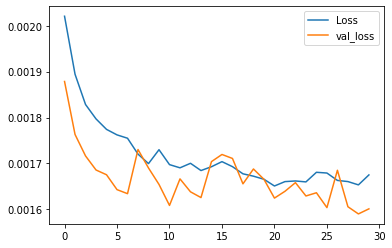

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [52]:
y_test_pre=model.predict(x_test)
# check length
y_test_pre.shape,y_test.shape

((3504, 1), (3504,))

In [53]:
#X_test.drop("station", axis=1, inplace=True).reset_index()
X_test.head()

PM2.5    PM10    SO2     NO2       CO      O3  \
station      date                                                         
Nongzhanguan 2016-05-13   823.0  1598.0  316.0  1631.0  21500.0  1662.0   
             2016-05-14   877.0  1006.0   82.0  1118.0   7800.0  1627.0   
             2016-05-15   803.0   992.0   50.0  1242.0   9700.0  1072.0   
             2016-05-16   567.0  1364.0   86.0  1300.0   8700.0  1627.0   
             2016-05-17  1475.0  2707.0  328.0  1494.0   7600.0  2773.0   

                          TEMP     PRES   DEWP  WSPM  ...  SO2_lag_1  \
station      date                                     ...              
Nongzhanguan 2016-05-13  421.3  24383.6   72.3  55.4  ...      156.0   
             2016-05-14  338.5  24305.1  235.4  42.1  ...      316.0   
             2016-05-15  422.0  24216.2   58.6  36.0  ...       82.0   
             2016-05-16  540.2  24091.1   51.0  64.0  ...       50.0   
             2016-05-17  592.2  24107.5  207.4  54.2  ...       86.0   

                         NO2_lag_1  CO_lag_1  O3_lag_1  TEMP_lag_1  \
station      date                                                    
Nongzhanguan 2016-05-13      920.0   21700.0    1683.0       423.4   
             2016-05-14     1631.0   21500.0    1662.0       421.3   
             2016-05-15     1118.0    7800.0    1627.0       338.5   
             2016-05-16     1242.0    9700.0    1072.0       422.0   
             2016-05-17     1300.0    8700.0    1627.0       540.2   

                         PRES_lag_1  DEWP_lag_1  RAIN_lag_1  WSPM_lag_1  \
station      date                                                         
Nongzhanguan 2016-05-13     24139.0       126.6        13.9        61.4   
             2016-05-14     24383.6        72.3         0.0        55.4   
             2016-05-15     24305.1       235.4         8.3        42.1   
             2016-05-16     24216.2        58.6         0.0        36.0   
             2016-05-17     24091.1        51.0         0.0        64.0   

                              station  
station      date                      
Nongzhanguan 2016-05-13  Nongzhanguan  
             2016-05-14  Nongzhanguan  
             2016-05-15  Nongzhanguan  
             2016-05-16  Nongzhanguan  
             2016-05-17  Nongzhanguan  

[5 rows x 23 columns]

In [54]:
pa=pd.DataFrame()
pa['Date']=X_test.drop("station", axis=1).reset_index().date.iloc[0:-1]
pa['station']=X_test.drop("station", axis=1).reset_index().station.iloc[0:-1]
pa['Prediction']=[i[0] for i in y_test_pre][1:] 
pa['Actual Values']=y_test[:-1]
pa.tail()

,Date,station,Prediction,Actual Values
3498,2017-02-23,Wanliu,0.0,0.0
3499,2017-02-24,Wanliu,0.0,0.0
3500,2017-02-25,Wanliu,0.0,0.0
3501,2017-02-26,Wanliu,0.0,0.0
3502,2017-02-27,Wanliu,0.0,0.0


In [55]:
pa["Prediction"].describe()

count    3503.000000
mean        0.007180
std         0.014198
min         0.000000
25%         0.000000
50%         0.000000
75%         0.009709
max         0.157214
Name: Prediction, dtype: float64

In [56]:
pa_station = pa[pa['station']=='Nongzhanguan']
pa_station.describe()

,Prediction,Actual Values
count,292.000000,292.000000
mean,0.006448,0.008494
std,0.013679,0.054778
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.005773,0.000000
max,0.141407,0.883721


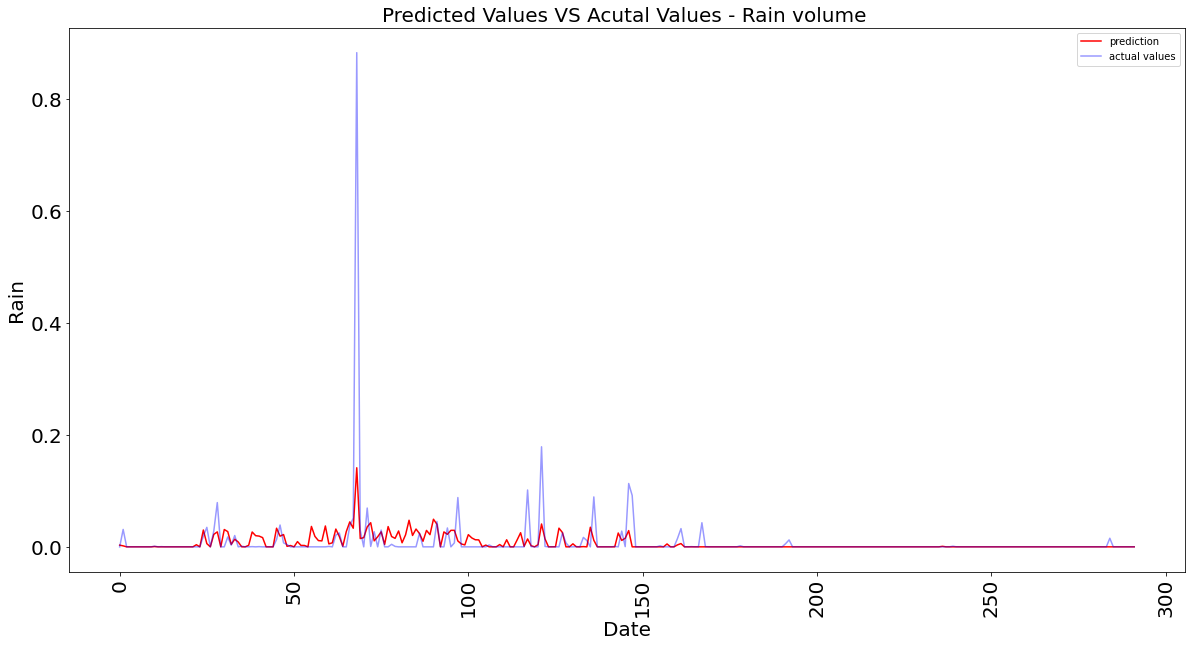

In [57]:
plt.figure(figsize=(20,10))
pa_station['Prediction'].plot(kind='line',label='prediction',color='red',alpha=1)
pa_station['Actual Values'].plot(kind='line',label='actual values',color='blue',alpha=0.4)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)

plt.ylabel('Rain',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.title('Predicted Values VS Acutal Values - Rain volume ',fontsize=20)
plt.legend()